## Exercise on a monthly milk production dataset

Exercise on Value of Manufacturers' Shipments for All Manufacturing Industries from
UMTMVS Dataset - https://fred.stlouisfed.org/series/UMTMVS

In [5]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

### Load the dataset

In [6]:
df = pd.read_csv("datasets/monthly_milk_production.csv", 
                 encoding='utf-8')

title = "Monthly Milk Production: pounds per cow, Jan '62 - Dec ' 75"

In [9]:
# Check the dataframe
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [10]:
# Check the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


### 1. What is the current data type of the Date column?

In [11]:
print(df.dtypes)
print(df['Date'].dtypes)

Date          object
Production     int64
dtype: object
object


### 2. Change the Date column to a datetime format

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

datetime64[ns]


### 3. Set the Date column to be the new index

In [13]:
df.set_index('Date', inplace=True)
print(df.head())

            Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727


### 4. Plot the DataFrame with a simple line plot. What do you notice about the plot?

<AxesSubplot:title={'center':'Monthly Milk Production: pounds per cow'}, xlabel='Date'>

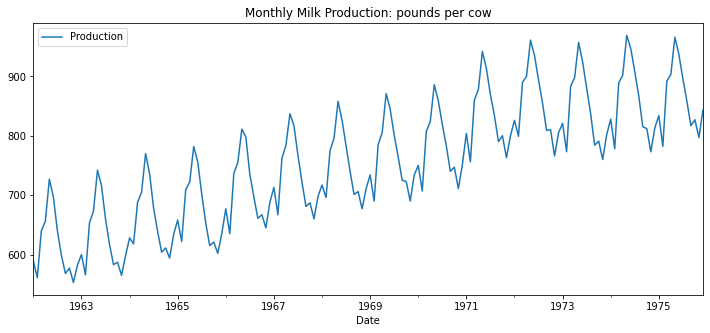

In [14]:
df.plot(figsize=(12, 5), title='Monthly Milk Production: pounds per cow')

Milk production is increasing year on year. Shows consistent seasonality and as well as upward trend

### 5. Add a column called 'Month' that takes the month value from the index

In [15]:
df['Month'] = df.index.month
print(df.head())

            Production  Month
Date                         
1962-01-01         589      1
1962-02-01         561      2
1962-03-01         640      3
1962-04-01         656      4
1962-05-01         727      5


In [16]:
# Another solution
df['Month'] = df.index.strftime('%B')
df.head()

,Production,Month
Date,,
1962-01-01,589,January
1962-02-01,561,February
1962-03-01,640,March
1962-04-01,656,April
1962-05-01,727,May


### 6. Create a BoxPlot that groups by the Month field

Text(0.5, 0.98, '')

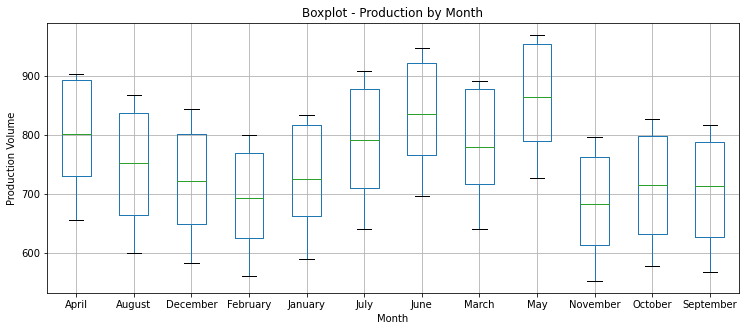

In [17]:
ax = df.boxplot(by='Month', figsize=(12, 5))
ax.set(xlabel='Month', ylabel='Production Volume')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.title('Boxplot - Production by Month')
plt.suptitle('')

### Read in the data UMTMVS.csv file from the Data folder

In [20]:
umt = pd.read_csv('datasets/UMTMVS.csv', 
                 index_col='DATE', parse_dates=True)

umt.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [21]:
# Check the index
umt.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

<AxesSubplot:xlabel='DATE'>

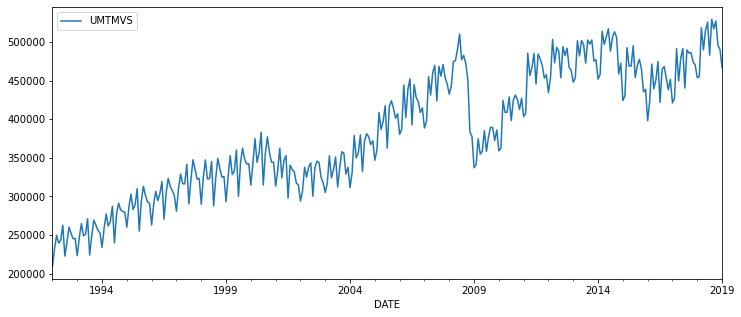

In [22]:
# We will plot the data
umt.plot(figsize=(12, 5))

### What was the percent increase in value from Jan 2009 to Jan 2019?

In [23]:
100 * (umt.loc['2019-01-01'] - umt.loc['2009-01-01'])/umt.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

### What was the percent decrease from Jan 2008 to Jan 2009?

In [24]:
100 * (umt.loc['2009-01-01'] - umt.loc['2008-01-01'])/umt.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

### What is the month with the least value after 2005?

In [25]:
print("Month with the least value after 2005")
print(umt.loc['2005-01-01':].idxmin())
print('\n')
print("Least Value after 2005")
print(umt.loc['2005-01-01':].min())

Month with the least value after 2005
UMTMVS   2009-01-01
dtype: datetime64[ns]


Least Value after 2005
UMTMVS    337101.0
dtype: float64


### What 6 months have the highest value?

In [26]:
umt.sort_values(by='UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


### How many millions of dollars in value was lost in 2008?

(Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)

In [27]:
umt.loc['2009-01-01'] - umt.loc['2008-01-01']

UMTMVS   -95206.0
dtype: float64

### Create a bar plot showing the average value in millions of dollars per year

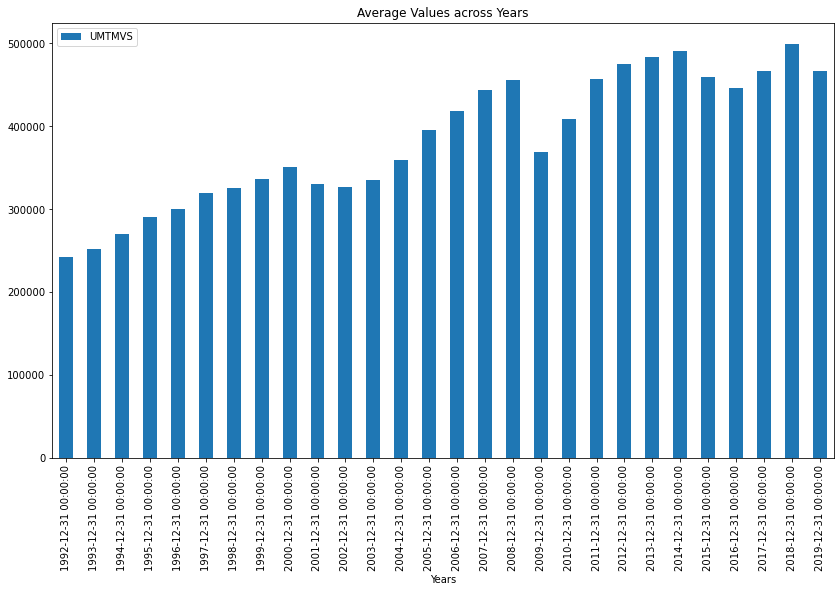

In [30]:
ax = umt.resample(rule='Y').mean().plot.bar(figsize=(14, 8), title='Average Values across Years')
ax.set(xlabel = 'Years');

### What year had the biggest increase in mean value from the previous year's mean value?

In [31]:
yearly_data = umt.resample(rule='Y').mean()

yearly_shift = yearly_data.shift(1)

change = yearly_data - yearly_shift

change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

### plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!

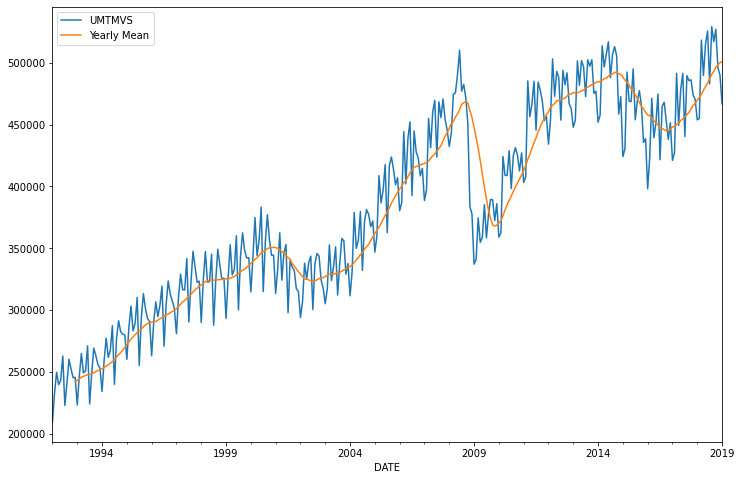

In [32]:
umt['Yearly Mean'] = umt.rolling(window=12).mean()
umt[['UMTMVS', 'Yearly Mean']].plot(figsize=(12, 8)).autoscale(axis='x', tight=True)

### Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak?

(Since it crashed immediately after this peak)

In [34]:
# We will load the data once again, because it has been resampled
umt = pd.read_csv('datasets/UMTMVS.csv', 
                 index_col='DATE', parse_dates=True)

# We will extract a dataframe with 2008 values
umt_2008 = umt.loc['2008-01-01':'2009-01-01']['UMTMVS']

# Check the date on which the max volume happened
print(umt_2008.idxmax())

# Check the max volume
print(umt_2008.max())

2008-06-01 00:00:00
510081.0


In [35]:
# Now we will extract all the values post peak
umt_2008_postpeak = umt['2008-06-01':]
# subsetting all the entries which is larger than the max volume
umt_2008_postpeak[umt_2008_postpeak >= umt_2008.max()].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [36]:
# So we see from the first entry after the peak in 2008-06-01, the month, in which it crossed the value
# is only in 2014-03-01

len(umt.loc['2008-06-01':'2014-03-01'])

70